In [ ]:
# !pip install cftime==1.0.0
# !pip list
# !pip install xarray
# !pip install netCDF4==1.5.8


In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import os
import sys
import glob
import numpy as np
import xarray as xr
import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

sys.path.append('/content/drive/MyDrive/TRABAJO DE GRADO - SCE/Proyecto Avanzado II/Workbench/')
sys.path.append('/content/drive/MyDrive/TRABAJO DE GRADO - SCE/Proyecto Avanzado II/Workbench/utils_gfat')

# sys.path.append('/Mi unidad/TRABAJO DE GRADO - SCE/Proyecto Avanzado II/Workbench')
# sys.path.append('/Mi unidad/TRABAJO DE GRADO - SCE/Proyecto Avanzado II/Workbench/utils_gfat')

from utils_gfat import quicklook_lidar, lidar, plot, solar, utils
from lidar_preprocessing import *


Mounted at /content/drive


In [54]:
def plot_as_me(ds, channel, axes, qt, wl, signal_mode, attrs, save_fig=False, **kwargs):
  cmap = mpl.cm.jet
  bounds = np.linspace(0, 100, 64)
  norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

  plot.title1('{instr} {mode} {qt} at {wl} {wlu}'.format(instr=attrs['system'],
                                                            mode=signal_mode,
                                                            qt=qt,
                                                            wl=wl,
                                                            wlu='nm'), coef=2.2)
  plot.title2(str(ds.time.values[0].astype('datetime64[D]')), coef=2.2)

  plot.title3('{} ({:.1f}N, {:.1f}E)'.format(attrs['site_location'], 
                                           float(attrs['geospatial_lat_min']), 
                                           float(attrs['geospatial_lon_min'])), coef=2.2)
  
  q = ds[:, ds.range<14000].plot.pcolormesh(x='time', 
                 y='range', 
                 cmap='jet', 
                 vmin=kwargs['vmin'], 
                 vmax=kwargs['vmax'],
                 # norm=norm
                 )
  myFmt = mdates.DateFormatter('%H:%M')
  axes.xaxis.set_major_formatter(myFmt)

  plot.gapsizer(axes, ds.time.values, ds.range, gapsize=5, colour='#c7c7c7')
  axes.set_xlim([ds.time[0].values.astype('datetime64[D]'), ds.time[0].values.astype('datetime64[D]')+np.timedelta64(1,'D')])
  # q.cmap.set_over('white')
  if save_fig:
    year, month, day = str(ds.time[0].values.astype('datetime64[D]')).split('-') 
    out_dir =  '/content/drive/MyDrive/TRABAJO DE GRADO - SCE/Proyecto Avanzado II/Workbench/output_dir/images'
    fl_name = '{instru}_{qt}_{wl}_{mode}_mode_{y}{m}{d}.jpg'.format(instru=attrs['system'], qt=qt, wl=wl, mode=signal_mode, y=year, m=month, d=day)
    fl_name = os.path.join(out_dir, fl_name)
    plt.savefig(fl_name, dpi=200)

def normalize_ds(ds_variable, operation='standar'):
  ds_ = ds_variable.copy()
  if operation == 'standar':
    for idx, prof in enumerate(ds_variable):
      mean = prof.mean()
      std = prof.std() 
      ds_[idx] = (prof - mean) / std 
      # pdb.set_trace()
  return ds_

# 1) Signal

In [3]:
ds = xr.load_dataset('/content/drive/MyDrive/TRABAJO DE GRADO - SCE/Datos/MULHACEN/mhc_1a_Prs_rs_xf_20220221.nc')


<class 'numpy.ndarray'>


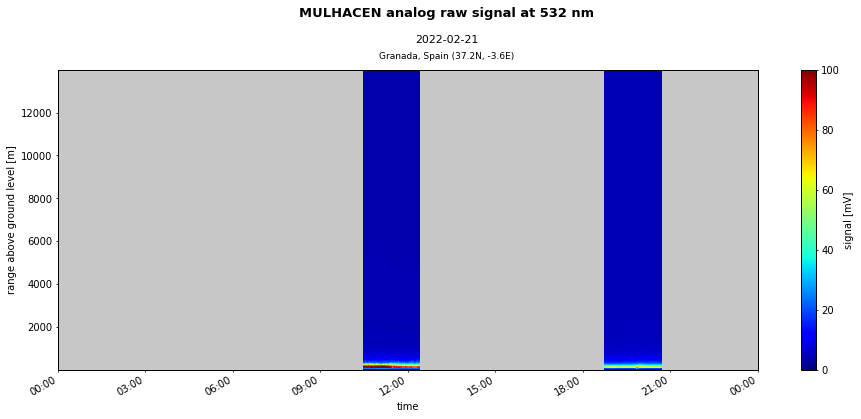

In [6]:
qt = 'raw signal'
wl = '532'
signal_mode = 'analog'
channel = 'signal_532xpa'
fig, axes = plt.subplots(nrows=1, figsize=(15,6))


plot_as_me(ds[channel], 
           channel, 
           axes, 
           qt, 
           wl,
           signal_mode, 
           attrs=ds.attrs, 
           vmax=100,
           vmin=0)

year, month, day = str(ds.time[0].values.astype('datetime64[D]')).split('-') 
out_dir =  '/content/drive/MyDrive/TRABAJO DE GRADO - SCE/Proyecto Avanzado II/Workbench/output_dir/images'
fl_name = '{instru}_{qt}_{wl}_{mode}_mode_{y}{m}{d}.jpg'.format(instru=ds.attrs['system'], qt=qt, wl=wl, mode=signal_mode, y=year, m=month, d=day)
fl_name = os.path.join(out_dir, fl_name)
plt.savefig(fl_name, dpi=200)

# 2) RAW - DC

In [ ]:
ds = lidar.preprocessing(rs_fl='/content/drive/MyDrive/TRABAJO DE GRADO - SCE/Datos/MULHACEN/*Prs*.nc', 
                             dc_fl='/content/drive/MyDrive/TRABAJO DE GRADO - SCE/Datos/MULHACEN/*Pdc*.nc', 
                             channels='all', subs_bg_flag=False)

<class 'numpy.ndarray'>


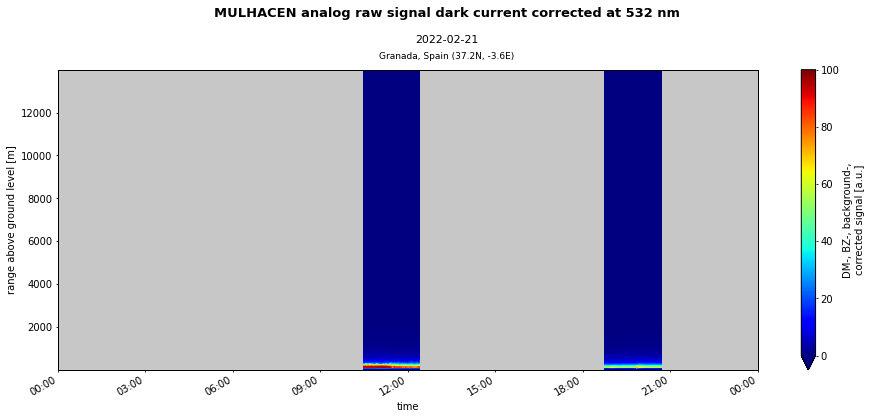

In [ ]:
qt = 'raw signal dark current corrected'
wl = '532'
signal_mode = 'analog'
channel = 'signal_532xpa'
fig, axes = plt.subplots(nrows=1, figsize=(15,6))

plot_as_me(ds[channel], channel, axes, qt, wl, signal_mode, attrs=ds.attrs, vmax=100)

year, month, day = str(ds.time[0].values.astype('datetime64[D]')).split('-') 
out_dir =  '/content/drive/MyDrive/TRABAJO DE GRADO - SCE/Proyecto Avanzado II/Workbench/output_dir/images'
fl_name = '{instru}_{qt}_{wl}_{mode}_mode_{y}{m}{d}.jpg'.format(instru=ds.attrs['system'], qt=qt, wl=wl, mode=signal_mode, y=year, m=month, d=day)
fl_name = os.path.join(out_dir, fl_name)
plt.savefig(fl_name, dpi=200)

# 3) RAW - DC - BG

In [ ]:
ds = lidar.preprocessing(rs_fl='/content/drive/MyDrive/TRABAJO DE GRADO - SCE/Datos/MULHACEN/*Prs*.nc', 
                             dc_fl='/content/drive/MyDrive/TRABAJO DE GRADO - SCE/Datos/MULHACEN/*Pdc*.nc', 
                             channels='all', subs_bg_flag=True)


<class 'numpy.ndarray'>


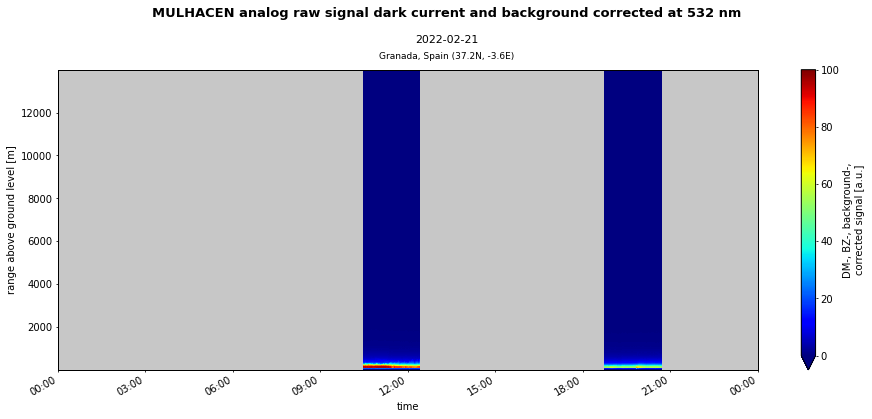

In [ ]:
qt = 'raw signal dark current and background corrected'
wl = '532'
signal_mode = 'analog'
channel = 'signal_532xpa'
fig, axes = plt.subplots(nrows=1, figsize=(15,6))

plot_as_me(ds[channel], channel, axes, qt, wl, signal_mode, attrs=ds.attrs, vmax=100)

year, month, day = str(ds.time[0].values.astype('datetime64[D]')).split('-') 
out_dir =  '/content/drive/MyDrive/TRABAJO DE GRADO - SCE/Proyecto Avanzado II/Workbench/output_dir/images'
fl_name = '{instru}_{qt}_{wl}_{mode}_mode_{y}{m}{d}.jpg'.format(instru=ds.attrs['system'], qt=qt, wl=wl, mode=signal_mode, y=year, m=month, d=day)
fl_name = os.path.join(out_dir, fl_name)
plt.savefig(fl_name, dpi=200)

# 4) RCS

In [ ]:
ds = lidar.preprocessing(rs_fl='/content/drive/MyDrive/TRABAJO DE GRADO - SCE/Datos/MULHACEN/*Prs*.nc', 
                             dc_fl='/content/drive/MyDrive/TRABAJO DE GRADO - SCE/Datos/MULHACEN/*Pdc*.nc', 
                             channels='all')

channel = 'signal_532xpa'
ds
# raw_dc_bg.to_netcdf(path='/content/drive/MyDrive/TRABAJO DE GRADO - SCE/Proyecto Avanzado II/Workbench/output_dir/mhc_rcs_20220221.nc')

<class 'numpy.ndarray'>


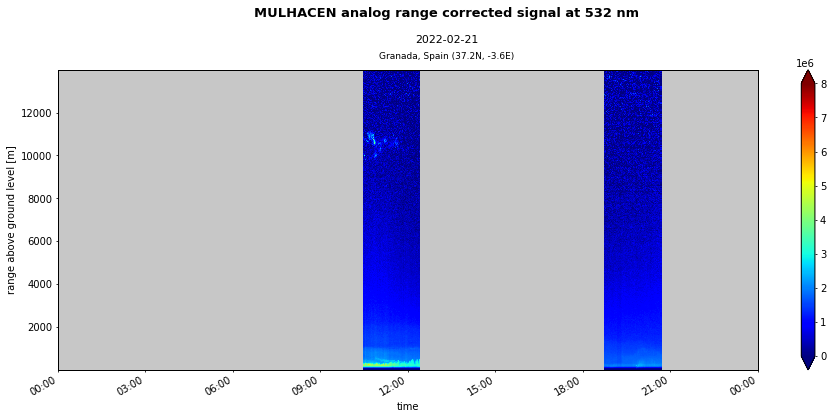

In [ ]:
qt = 'range corrected signal'
wl = '532'
signal_mode = 'analog'
channel = 'signal_532xpa'
fig, axes = plt.subplots(nrows=1, figsize=(15,6))


plot_as_me(ds[channel]*ds.range**2, channel, axes, qt, wl, signal_mode, attrs=ds.attrs, vmax=8e6)


year, month, day = str(ds.time[0].values.astype('datetime64[D]')).split('-') 
out_dir =  '/content/drive/MyDrive/TRABAJO DE GRADO - SCE/Proyecto Avanzado II/Workbench/output_dir/images'
fl_name = '{instru}_{qt}_{wl}_{mode}_mode_{y}{m}{d}.jpg'.format(instru=ds.attrs['system'], qt=qt, wl=wl, mode=signal_mode, y=year, m=month, d=day)
fl_name = os.path.join(out_dir, fl_name)
plt.savefig(fl_name, dpi=200)

Usar este día en RSF

# 5) Representación de las señales anteriores en 3 longitudes de onda.

## Raw

In [ ]:
ds = xr.load_dataset('/content/drive/MyDrive/TRABAJO DE GRADO - SCE/Datos/MULHACEN/mhc_1a_Prs_rs_xf_20220221.nc')
channel = ['signal_1064xta', 'signal_355xta', 'signal_532xpp']
signal_mode = ['analog', 'analog', 'photon count']
wl = ['1064', '355', '532']
clims = {'355xta': (0,3e6),'532xpa': (0,8e6),'532xpp': (0,2.5e8), '532xca': (0,8e6), '1064xta': (0,8e7)}

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


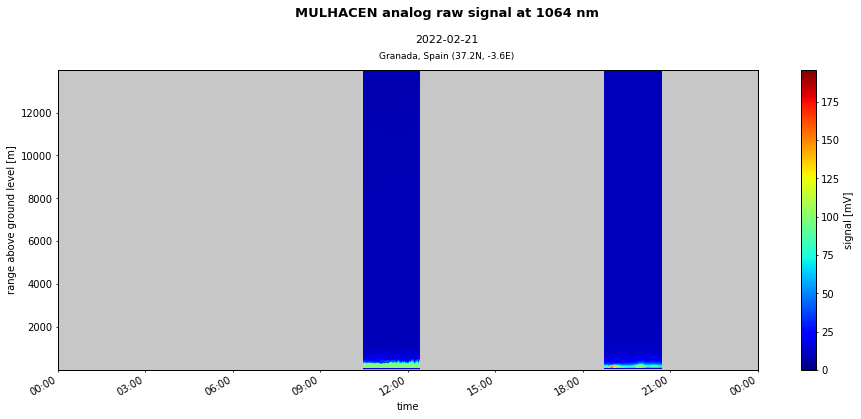

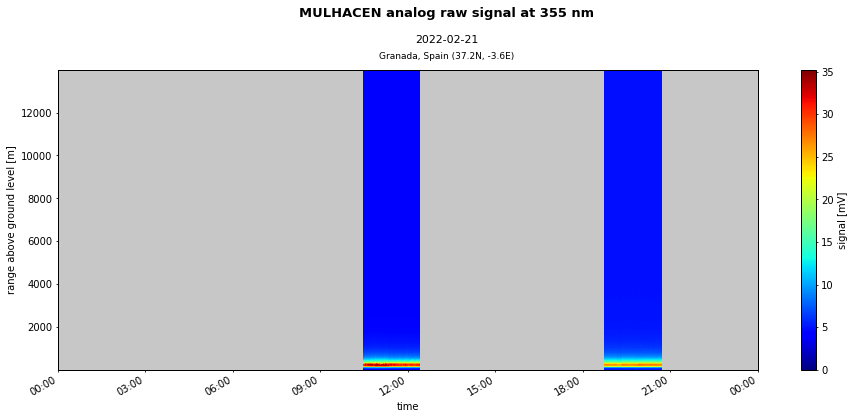

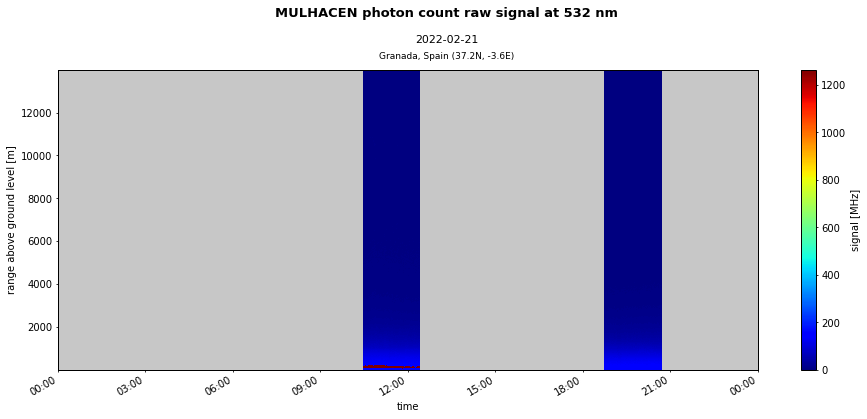

In [ ]:
qt = 'raw signal'
for idx, chan in enumerate(channel):
  fig, axes = plt.subplots(nrows=1, figsize=(15,6))


  plot_as_me(ds[chan], chan, axes, qt, wl[idx], signal_mode[idx], attrs=ds.attrs, vmax=None)


  year, month, day = str(ds.time[0].values.astype('datetime64[D]')).split('-') 
  out_dir =  '/content/drive/MyDrive/TRABAJO DE GRADO - SCE/Proyecto Avanzado II/Workbench/output_dir/images'
  fl_name = '{instru}_{qt}_{wl}_{mode}_mode_{y}{m}{d}.jpg'.format(instru=ds.attrs['system'], 
                                                                  qt=qt, 
                                                                  wl=wl[idx], 
                                                                  mode=signal_mode[idx], 
                                                                  y=year, 
                                                                  m=month, 
                                                                  d=day)
  fl_name = os.path.join(out_dir, fl_name)
  plt.savefig(fl_name, dpi=200)

## Raw - DC

In [ ]:
ds = lidar.preprocessing(rs_fl='/content/drive/MyDrive/TRABAJO DE GRADO - SCE/Datos/MULHACEN/*Prs*.nc', 
                             dc_fl='/content/drive/MyDrive/TRABAJO DE GRADO - SCE/Datos/MULHACEN/*Pdc*.nc', 
                             channels='all', subs_bg_flag=False)
channel = ['signal_1064xta', 'signal_355xta', 'signal_532xpp']
signal_mode = ['analog', 'analog', 'photon count']
wl = ['1064', '355', '532']
clims = {'355xta': (0,3e6),'532xpa': (0,8e6),'532xpp': (0,2.5e8), '532xca': (0,8e6), '1064xta': (0,8e7)}

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


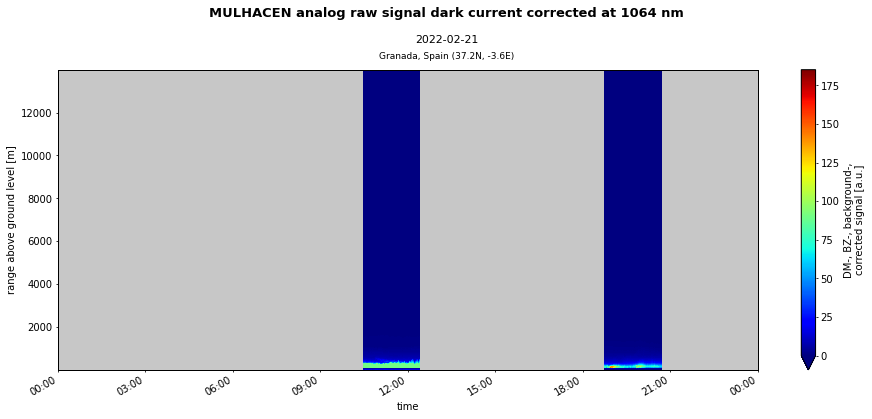

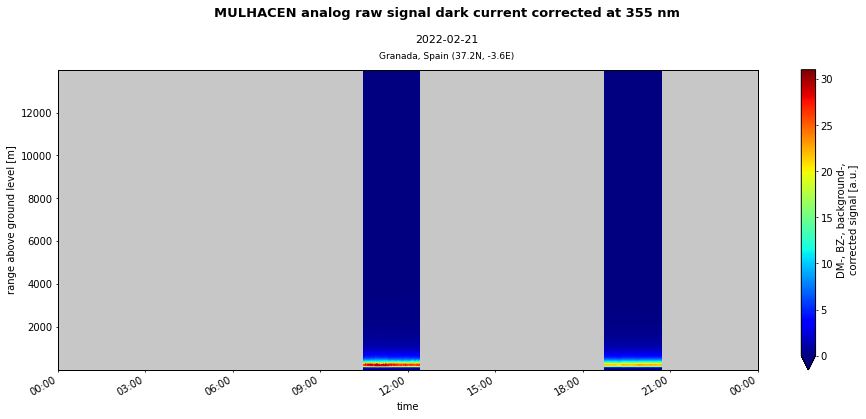

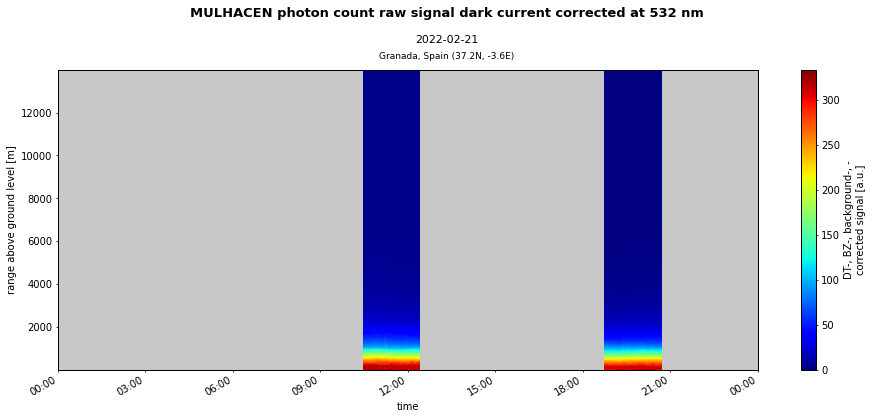

In [ ]:
qt = 'raw signal dark current corrected'
for idx, chan in enumerate(channel):
  fig, axes = plt.subplots(nrows=1, figsize=(15,6))


  plot_as_me(ds[chan], chan, axes, qt, wl[idx], signal_mode[idx], attrs=ds.attrs, vmax=None)


  year, month, day = str(ds.time[0].values.astype('datetime64[D]')).split('-') 
  out_dir =  '/content/drive/MyDrive/TRABAJO DE GRADO - SCE/Proyecto Avanzado II/Workbench/output_dir/images'
  fl_name = '{instru}_{qt}_{wl}_{mode}_mode_{y}{m}{d}.jpg'.format(instru=ds.attrs['system'], 
                                                                  qt=qt, 
                                                                  wl=wl[idx], 
                                                                  mode=signal_mode[idx], 
                                                                  y=year, 
                                                                  m=month, 
                                                                  d=day)
  fl_name = os.path.join(out_dir, fl_name)
  plt.savefig(fl_name, dpi=200)

## Raw - DC - BG

In [ ]:
ds = lidar.preprocessing(rs_fl='/content/drive/MyDrive/TRABAJO DE GRADO - SCE/Datos/MULHACEN/*Prs*.nc', 
                             dc_fl='/content/drive/MyDrive/TRABAJO DE GRADO - SCE/Datos/MULHACEN/*Pdc*.nc', 
                             channels='all', subs_bg_flag=True)
channel = ['signal_1064xta', 'signal_355xta', 'signal_532xpp']
signal_mode = ['analog', 'analog', 'photon count']
wl = ['1064', '355', '532']
clims = {'355xta': (0,3e6),'532xpa': (0,8e6),'532xpp': (0,2.5e8), '532xca': (0,8e6), '1064xta': (0,8e7)}

In [ ]:
qt = 'raw signal dark current and background corrected'
for idx, chan in enumerate(channel):
  fig, axes = plt.subplots(nrows=1, figsize=(15,6))


  plot_as_me(ds[chan], chan, axes, qt, wl[idx], signal_mode[idx], attrs=ds.attrs, vmax=None)


  year, month, day = str(ds.time[0].values.astype('datetime64[D]')).split('-') 
  out_dir =  '/content/drive/MyDrive/TRABAJO DE GRADO - SCE/Proyecto Avanzado II/Workbench/output_dir/images'
  fl_name = '{instru}_{qt}_{wl}_{mode}_mode_{y}{m}{d}.jpg'.format(instru=ds.attrs['system'], 
                                                                  qt=qt, 
                                                                  wl=wl[idx], 
                                                                  mode=signal_mode[idx], 
                                                                  y=year, 
                                                                  m=month, 
                                                                  d=day)
  fl_name = os.path.join(out_dir, fl_name)
  plt.savefig(fl_name, dpi=200)

## RCS

In [ ]:
ds = lidar.preprocessing(rs_fl='/content/drive/MyDrive/TRABAJO DE GRADO - SCE/Datos/MULHACEN/*Prs*.nc', 
                             dc_fl='/content/drive/MyDrive/TRABAJO DE GRADO - SCE/Datos/MULHACEN/*Pdc*.nc', 
                             channels='all')
channel = ['signal_1064xta', 'signal_355xta', 'signal_532xpp', 'signal_532xpa']
signal_mode = ['analog', 'analog', 'photon count', 'analog']
wl = ['1064', '355', '532', '532']
clims = {'355xta': (0,3e6),'532xpa': (0,8e6),'532xpp': (0,2.5e8), '532xca': (0,8e6), '1064xta': (0,1.2e7)}
ds

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


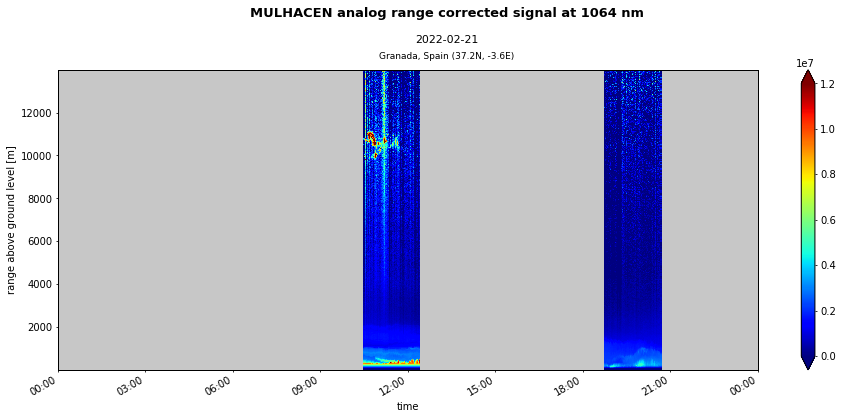

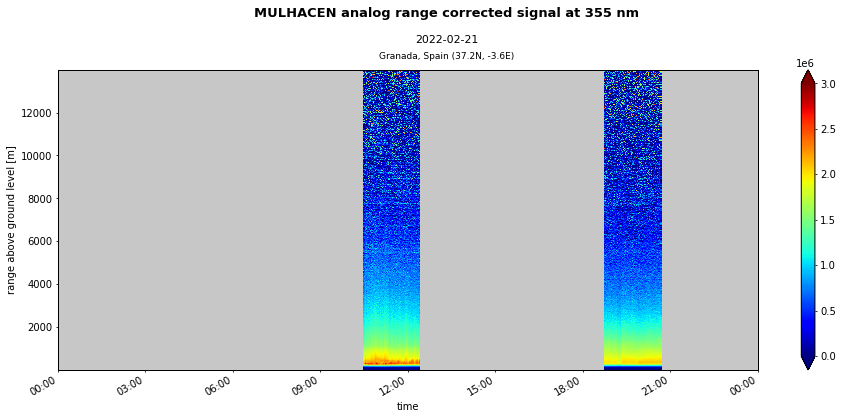

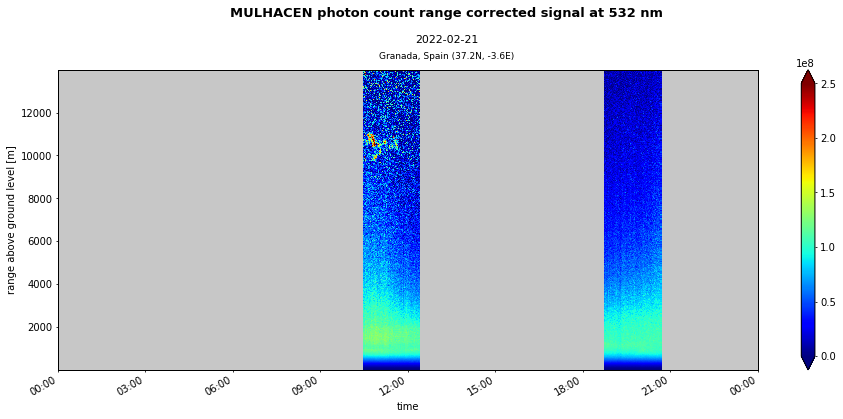

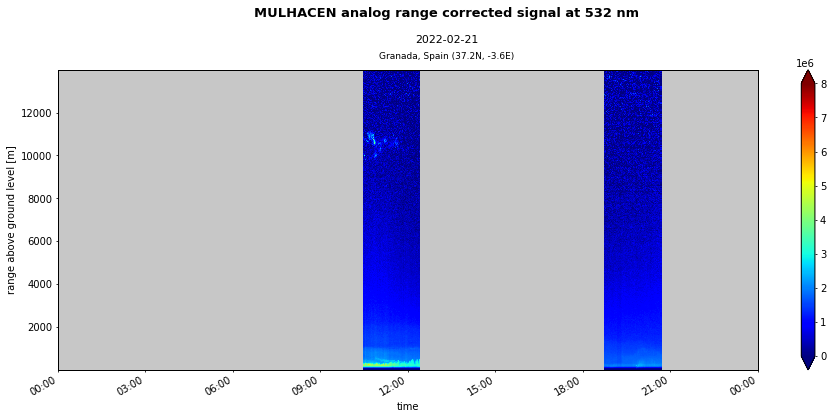

In [ ]:
qt = 'range corrected signal'
for idx, chan in enumerate(channel):
  fig, axes = plt.subplots(nrows=1, figsize=(15,6))


  plot_as_me(ds[chan]*ds.range**2, chan, axes, qt, wl[idx], signal_mode[idx], attrs=ds.attrs, vmax=clims[chan[7:]][1])


  year, month, day = str(ds.time[0].values.astype('datetime64[D]')).split('-') 
  out_dir =  '/content/drive/MyDrive/TRABAJO DE GRADO - SCE/Proyecto Avanzado II/Workbench/output_dir/images'
  fl_name = '{instru}_{qt}_{wl}_{mode}_mode_{y}{m}{d}.jpg'.format(instru=ds.attrs['system'], 
                                                                  qt=qt, 
                                                                  wl=wl[idx], 
                                                                  mode=signal_mode[idx], 
                                                                  y=year, 
                                                                  m=month, 
                                                                  d=day)
  fl_name = os.path.join(out_dir, fl_name)
  plt.savefig(fl_name, dpi=200)

# 6) Selecionar un día de interés

In [5]:
dirs = glob.glob('/content/drive/MyDrive/TRABAJO DE GRADO - SCE/Proyecto Avanzado II/Workbench/1a/*')

# ds = xr.open_dataset('/content/drive/MyDrive/TRABAJO DE GRADO - SCE/Proyecto Avanzado II/Workbench/1a/20210709/mhc_rcs_20210709.nc')
channel = 'corrected_signal_00'
# ds
dirs[-1]

'/content/drive/MyDrive/TRABAJO DE GRADO - SCE/Proyecto Avanzado II/Workbench/1a/20160629'

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


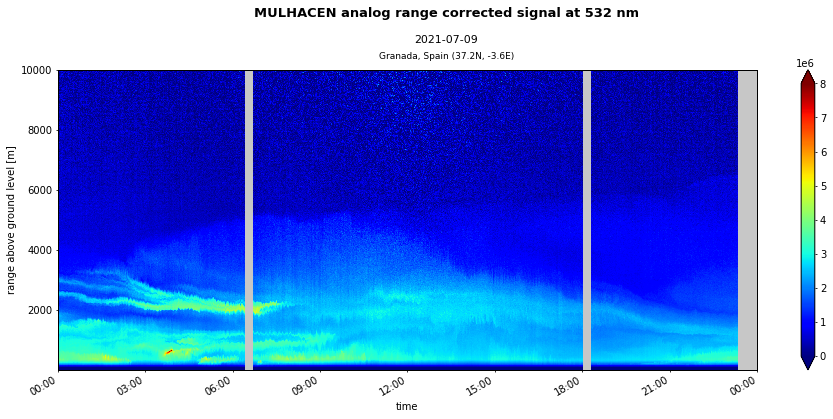

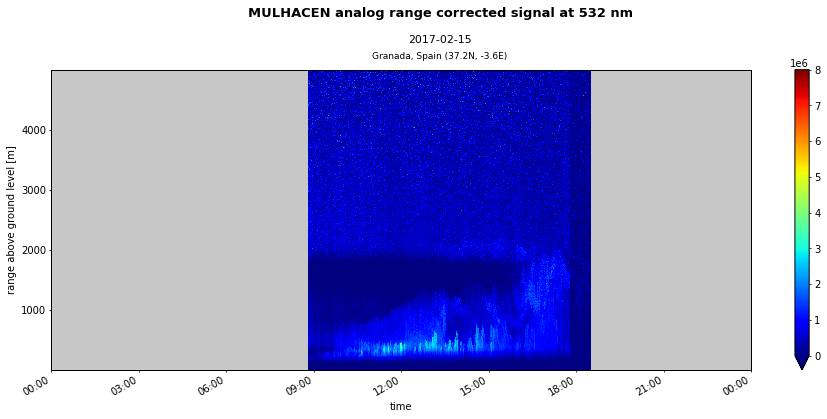

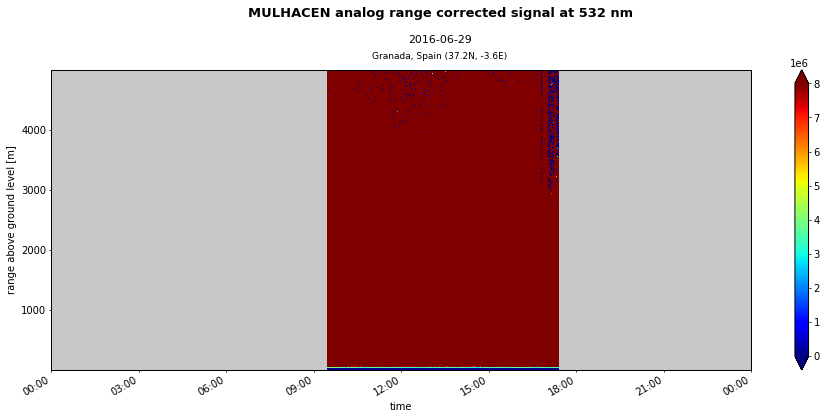

In [9]:
for dir in dirs:
  fl = glob.glob(os.path.join(dir, '*mhc_rcs_*.nc'))
  ds = xr.open_dataset(fl[0])
  qt = 'range corrected signal'
  wl = '532'
  signal_mode = 'analog'
  fig, axes = plt.subplots(nrows=1, figsize=(15,6))


  plot_as_me(ds[channel]*ds.range**2, channel, axes, qt, wl, signal_mode, attrs=ds.attrs, vmax=8e6, vmin=0)


  year, month, day = str(ds.time[0].values.astype('datetime64[D]')).split('-') 
  out_dir =  '/content/drive/MyDrive/TRABAJO DE GRADO - SCE/Proyecto Avanzado II/Workbench/output_dir/images'
  fl_name = '{instru}_{qt}_{wl}_{mode}_mode_{y}{m}{d}.jpg'.format(instru=ds.attrs['system'], qt=qt, wl=wl, mode=signal_mode, y=year, m=month, d=day)
  fl_name = os.path.join(out_dir, fl_name)
  plt.savefig(fl_name, dpi=200)

# 10)

In [3]:
ds = xr.open_dataset('/content/drive/MyDrive/TRABAJO DE GRADO - SCE/Proyecto Avanzado II/Workbench/1a/20210709/mhc_rcs_20210709.nc')
rcs = ['corrected_rcs_00', 'corrected_rcs_02']
signal = ['corrected_signal_00', 'corrected_signal_02']
ds

<xarray.Dataset>
Dimensions:                (range: 1333, time: 1395, nv: 2, n_chan: 2)
Coordinates:
  * range                  (range) float32 7.5 15.0 22.5 ... 9.99e+03 9.998e+03
  * time                   (time) datetime64[ns] 2021-07-09T00:00:42 ... 2021...
  * n_chan                 (n_chan) int32 0 2
Dimensions without coordinates: nv
Data variables: (12/48)
    time_bnds              (time, nv) datetime64[ns] ...
    lat                    float32 ...
    lon                    float32 ...
    altitude               float32 ...
    wavelength             (n_chan) float32 ...
    telescope              (n_chan) int32 ...
    ...                     ...
    corrected_rcs_02       (time, range) float64 ...
    dc_smoothed_02         (time, range) float64 ...
    bin_zero               (n_chan) float64 ...
    dead_time              (n_chan) float64 ...
    total_rcs532_an        (time, range) float64 ...
    LVDR532_an             (time, range) float64 ...
Attributes: (12/74)
    system:                          MULHACEN
    manufacturers:                   Raymetrics
    overlap_is_corrected:            false
    overlap_function:                false
    site_location:                   Granada, Spain
    instrument_id:                   MULHACEN
    ...                              ...
    telescope0_manufacturer:         Raymetrics
    telescope0_model:                special
    BCK_MIN_ALT:                     75000
    BCK_MAX_ALT:                     105000
    lidarNick:                       mhc
    dataversion:                     1a

In [4]:
ds = ds.assign_coords(range=ds.range/1000)

In [ ]:
# ds[rcs[0]].rolling(dim={'range':3, 'time':10}, min_periods=3).std().plot.pcolormesh(x='time', y='range')

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


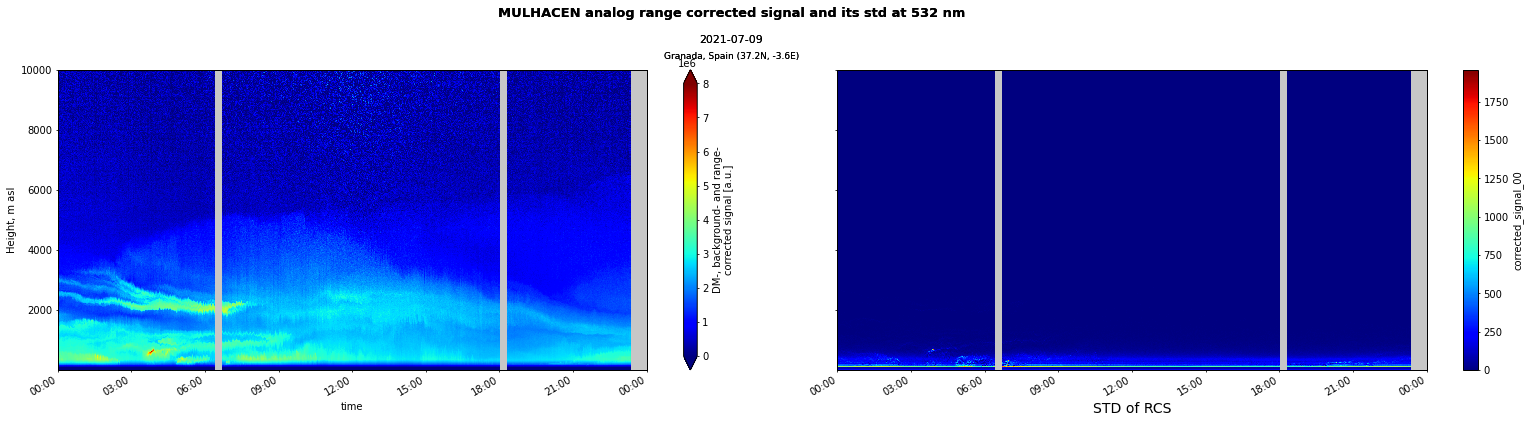

In [15]:
qt = 'range corrected signal and its std'
wl = '532'
signal_mode = 'analog'
channel = 'signal_532xpa'
t_win = 1
fig, ax = plt.subplots(figsize=[26,6])

ax1 = plt.subplot(1,6,(1,3))

plot_as_me(ds[rcs[0]], 
           channel, 
           ax1, 
           qt, 
           wl, 
           signal_mode, 
           attrs=ds.attrs, 
           vmin =0,
           vmax=8e6)

ax2 = plt.subplot(1,6,(4,15), sharey=ax1)

# media_std= ds[signal[0]].rolling(dim={'range':3, 'time':t_win}, min_periods=3).std().sel(time=time, range=slice(6000, 10000))[0].mean()
# nstd = ds[signal[0]].rolling(dim={'range':3, 'time':t_win}, min_periods=3).std().sel(time=time, method='nearest')[0] / media_std 

media_std= ds[signal[0]].rolling(dim={'range':3, 'time':t_win}, min_periods=3).std().sel(range=slice(6000, 10000)).mean()
nstd = ds[signal[0]].rolling(dim={'range':3, 'time':t_win}, min_periods=3).std() / media_std 

plot_as_me(nstd,
# plot_as_me(ds[signal[0]].rolling(dim={'range':3, 'time':10}, min_periods=3).std(), 
           channel, 
           ax2, 
           qt, 
           wl, 
           signal_mode, 
           attrs=ds.attrs,
           vmin =0, 
           vmax=None
           )


ax2.set_ylabel('')
ax1.set_ylabel('Height, m asl')
ax2.set_xlabel('STD of RCS', fontsize=14)
o_ = plt.setp(ax2.get_yticklabels(), visible=False)


year, month, day = str(ds.time[0].values.astype('datetime64[D]')).split('-') 
out_dir =  '/content/drive/MyDrive/TRABAJO DE GRADO - SCE/Proyecto Avanzado II/Workbench/output_dir/images'
fl_name = '{instru}_{qt}_{wl}_{mode}_mode_{y}{m}{d}.jpg'.format(instru=ds.attrs['system'], qt=qt, wl=wl, mode=signal_mode, y=year, m=month, d=day)
fl_name = os.path.join(out_dir, fl_name)
plt.savefig(fl_name, dpi=200)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


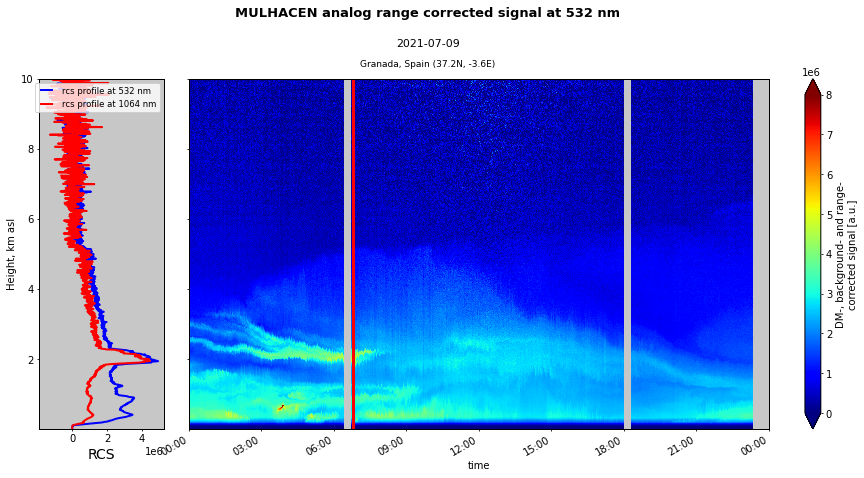

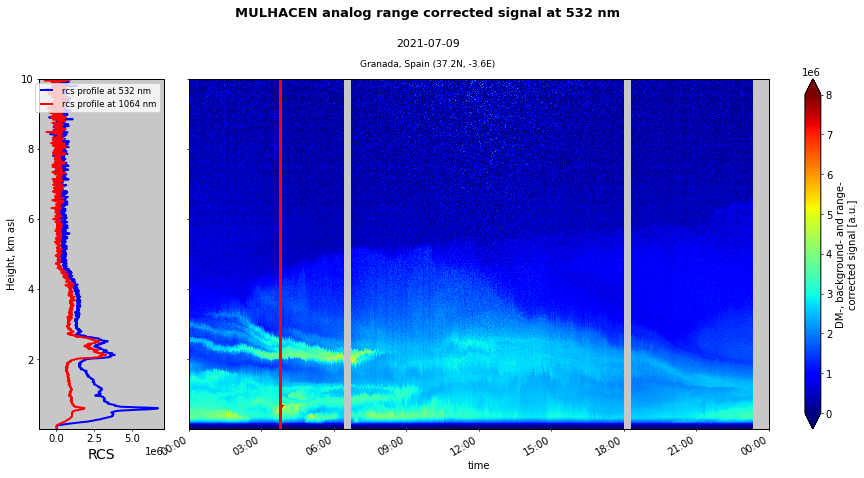

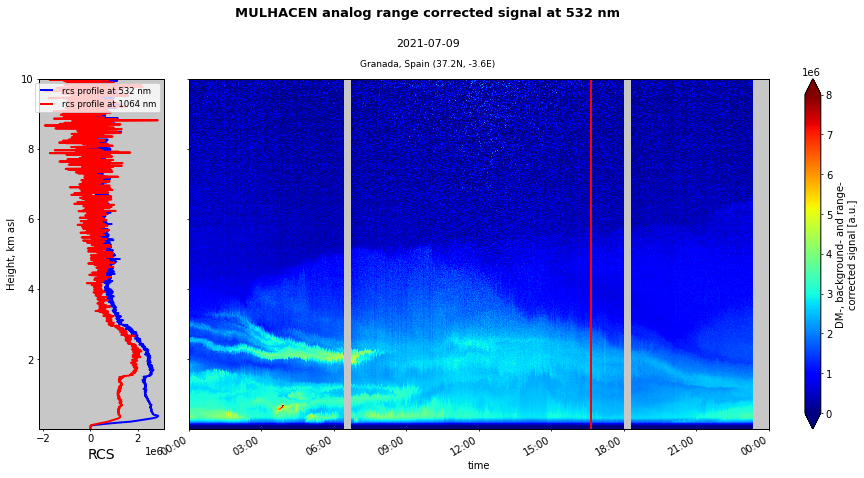

In [31]:
qt = 'range corrected signal'
wl = '532'
signal_mode = 'analog'
channel = 'signal_532xpa'

for time in ['2021-07-09T06:48:16.000000000', '2021-07-09T03:47:14.000000000', '2021-07-09T16:38:16.000000000']:
  fig, ax = plt.subplots(figsize=[15,7])


  # plot.title1('{instr} range corrected at {wl}? {wlu}'.format(instr=ds.attrs['system'],
  #                                                             wl=532,
  #                                                             wlu='nm'), coef=2)
  # plot.title2(str(ds.time.values[0].astype('datetime64[D]')), coef=2)

  # plot.title3('{} ({:.1f}N, {:.1f}E)'.format(ds.attrs['site_location'], 
  #                                           float(ds.attrs['geospatial_lat_min']), 
  #                                           float(ds.attrs['geospatial_lon_min'])), coef=2)

  

  ax1 = plt.subplot(1,6,(1))

  ax1.plot(ds[rcs[0]].sel(time=time, method='nearest')[0].values, ds.range.values, lw=2, c='b', label='rcs profile at 532 nm')
  ax1.plot(ds[rcs[1]].sel(time=time, method='nearest')[0].values, ds.range.values, lw=2, c='r', label='rcs profile at 1064 nm')
  ax1.legend(fontsize=8.5)

  ax2 = plt.subplot(1,6,(2,6), sharey=ax1)
  # q = ds[rcs[0]][:, ds[rcs[0]].range<10000].plot.pcolormesh(x='time', 
  #                 y='range', 
  #                 cmap='jet', 
  #                 vmin=0, 
  #                 vmax=8e6,
  #                 # norm=norm
  #                 )
  
  plot_as_me(ds[rcs[0]], 
           channel, 
           ax2, 
           qt, 
           wl, 
           signal_mode, 
           attrs=ds.attrs, 
           vmax=8e6,
           vmin=0)


  
  # Create rectangle x coordinates
  startTime = dt.datetime.strptime(time,'%Y-%m-%dT%H:%M:%S.000000000')
  endTime = dt.datetime.strptime(time,'%Y-%m-%dT%H:%M:%S.000000000') + dt.timedelta(minutes=1)
  start = mpl.dates.date2num(startTime)
  end = mpl.dates.date2num(endTime)
  width = end - start
  rect = mpl.patches.Rectangle((start, 0), width, 10000, linewidth=2,color='red',fill=False)
  ax2.add_patch(rect)
  ax2.set_ylabel('')
  ax1.set_ylabel('Height, km asl')
  ax1.set_xlabel('RCS', fontsize=14)
  o_ = plt.setp(ax2.get_yticklabels(), visible=False)

  year, month, day = str(ds.time[0].values.astype('datetime64[D]')).split('-')
  hour = dt.datetime.strptime(time,'%Y-%m-%dT%H:%M:%S.000000000').hour
  minute = dt.datetime.strptime(time,'%Y-%m-%dT%H:%M:%S.000000000').minute
  out_dir =  '/content/drive/MyDrive/TRABAJO DE GRADO - SCE/Proyecto Avanzado II/Workbench/output_dir/images'
  fl_name = '{instru}_{qt}_with_profile at_{hour}{minute}_{wl}_{mode}_mode_{y}{m}{d}.jpg'.format(instru=ds.attrs['system'], qt=qt, hour=hour, minute=minute, wl=wl, mode=signal_mode, y=year, m=month, d=day)
  fl_name = os.path.join(out_dir, fl_name)
  plt.savefig(fl_name, dpi=200)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


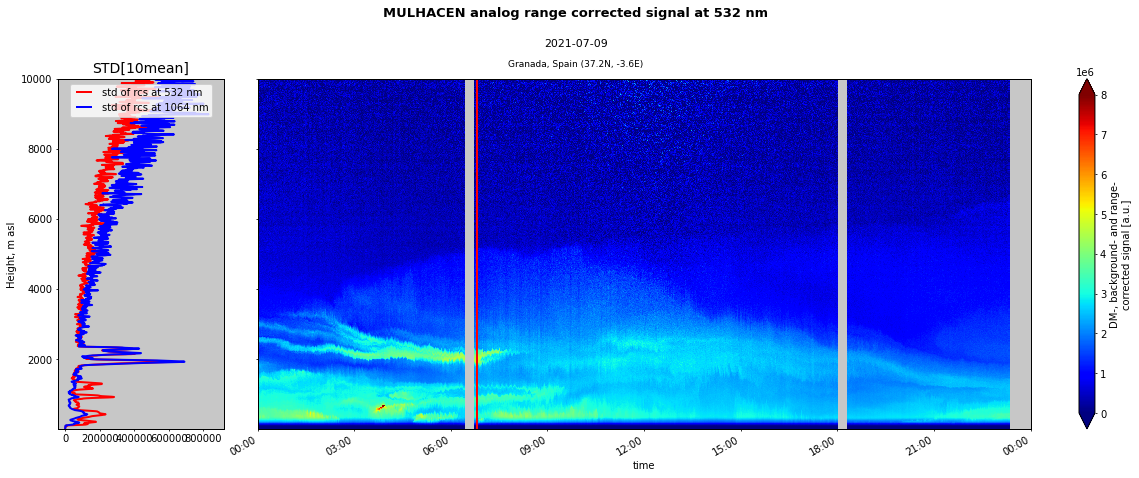

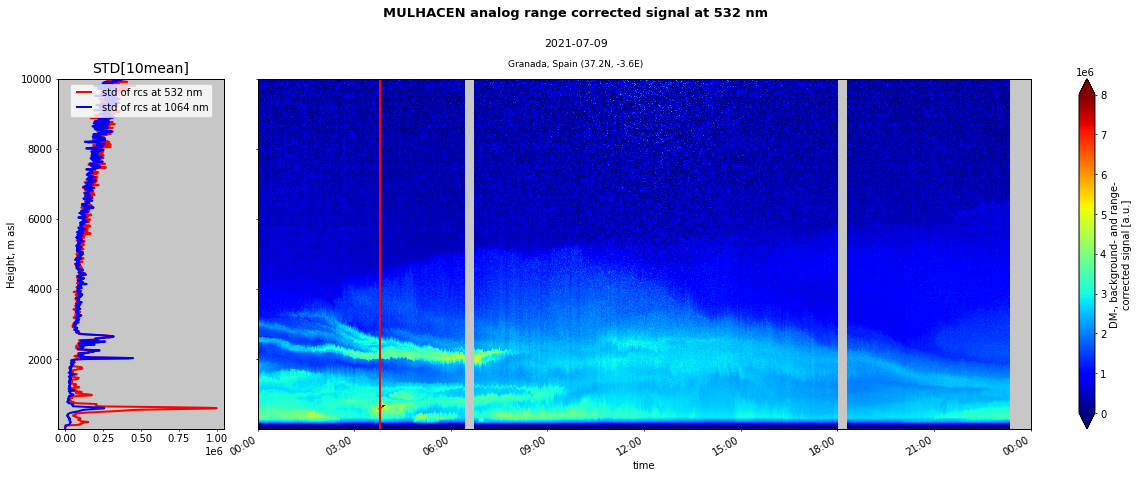

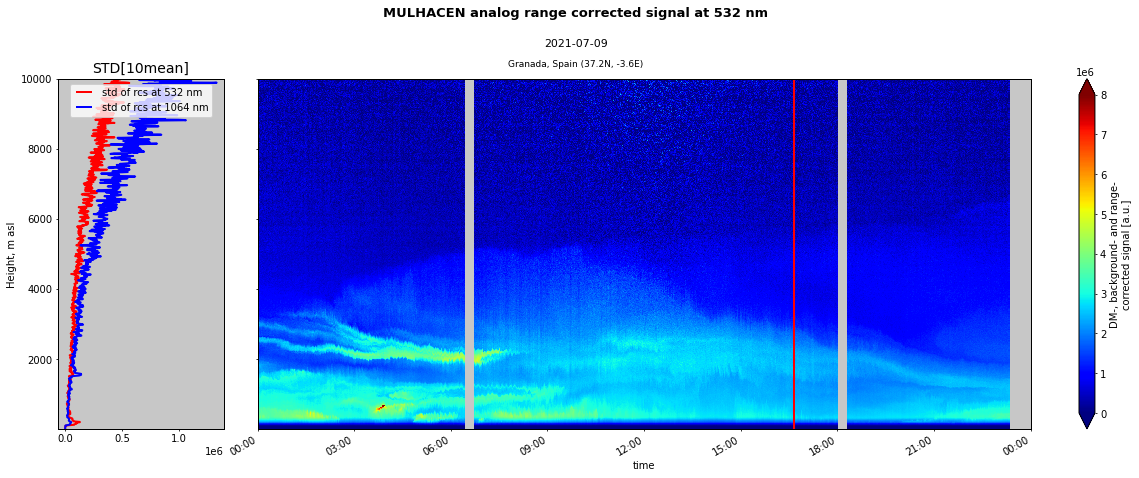

In [ ]:
qt = 'range corrected signal'
wl = '532'
signal_mode = 'analog'
channel = 'signal_532xpa'
time_win = 10

for time in ['2021-07-09T06:48:16.000000000', '2021-07-09T03:47:14.000000000', '2021-07-09T16:38:16.000000000']:
  fig, ax = plt.subplots(figsize=[20,7])


  ax1 = plt.subplot(1,6,(1))

  # ax1.plot(ds[rcs[0]].sel(time=time, method='nearest')[0].values, ds.range.values, lw=1, c='black', label='rcs at 532 nm')
  ax1.plot(ds[rcs[0]].rolling(dim={'range':3, 'time':time_win}, min_periods=3).std().sel(time=time, method='nearest')[0].values, 
           ds.range.values, lw=2, c='r', label='std of rcs at 532 nm')
  ax1.plot(ds[rcs[1]].rolling(dim={'range':3, 'time':time_win}, min_periods=3).std().sel(time=time, method='nearest')[0].values, 
           ds.range.values, lw=2, c='b', label='std of rcs at 1064 nm')
  ax1.legend(fontsize=10, loc='upper center')


  ax2 = plt.subplot(1,6,(2,6), sharey=ax1)
  plot_as_me(ds[rcs[0]], 
           channel, 
           ax2, 
           qt, 
           wl, 
           signal_mode, 
           attrs=ds.attrs, 
           vmax=8e6)


  
  # Create rectangle x coordinates
  startTime = dt.datetime.strptime(time,'%Y-%m-%dT%H:%M:%S.000000000')
  endTime = dt.datetime.strptime(time,'%Y-%m-%dT%H:%M:%S.000000000') + dt.timedelta(minutes=1)
  start = mpl.dates.date2num(startTime)
  end = mpl.dates.date2num(endTime)
  width = end - start
  rect = mpl.patches.Rectangle((start, 0), width, 10000, linewidth=2,color='red',fill=False)
  ax2.add_patch(rect)
  ax2.set_ylabel('')
  ax1.set_ylabel('Height, m asl')
  ax1.ticklabel_format(axis='x', style='sci')
  # ax1.set_xlabel('STD', fontsize=14)
  ax1.set_title('STD[{time}mean]'.format(time=time_win), fontsize=14)
  o_ = plt.setp(ax2.get_yticklabels(), visible=False)

  year, month, day = str(ds.time[0].values.astype('datetime64[D]')).split('-')
  hour = dt.datetime.strptime(time,'%Y-%m-%dT%H:%M:%S.000000000').hour
  minute = dt.datetime.strptime(time,'%Y-%m-%dT%H:%M:%S.000000000').minute
  out_dir =  '/content/drive/MyDrive/TRABAJO DE GRADO - SCE/Proyecto Avanzado II/Workbench/output_dir/images'
  fl_name = '{instru}_{qt}_with_STD[{time}mean]_profile at_{hour}{minute}_{wl}_{mode}_mode_{y}{m}{d}.jpg'.format(instru=ds.attrs['system'], qt=qt, hour=hour, time=time_win, minute=minute, wl=wl, mode=signal_mode, y=year, m=month, d=day)
  fl_name = os.path.join(out_dir, fl_name)
  plt.savefig(fl_name, dpi=200)


In [ ]:
qt = 'range corrected signal'
wl = '532'
signal_mode = 'analog'
channel = 'signal_532xpa'
time_win = [15, 30, 60]

for t_win in time_win:
  for time in ['2021-07-09T06:48:16.000000000', '2021-07-09T03:47:14.000000000', '2021-07-09T16:38:16.000000000']:
    fig, ax = plt.subplots(figsize=[20,7])


    ax1 = plt.subplot(1,6,(1))

    # ax1.plot(ds[rcs[0]].sel(time=time, method='nearest')[0].values, ds.range.values, lw=1, c='black', label='rcs at 532 nm')
    ax1.plot(ds[rcs[0]].rolling(dim={'range':3, 'time':t_win}, min_periods=3).std().sel(time=time, method='nearest')[0].values, 
            ds.range.values, lw=2, c='r', label='std of rcs at 532 nm')
    ax1.plot(ds[rcs[1]].rolling(dim={'range':3, 'time':t_win}, min_periods=3).std().sel(time=time, method='nearest')[0].values, 
            ds.range.values, lw=2, c='b', label='std of rcs at 1064 nm')
    ax1.legend(fontsize=10, loc='upper center')


    ax2 = plt.subplot(1,6,(2,6), sharey=ax1)
    plot_as_me(ds[rcs[0]], 
            channel, 
            ax2, 
            qt, 
            wl, 
            signal_mode, 
            attrs=ds.attrs, 
            vmax=8e6)


    
    # Create rectangle x coordinates
    startTime = dt.datetime.strptime(time,'%Y-%m-%dT%H:%M:%S.000000000')
    endTime = dt.datetime.strptime(time,'%Y-%m-%dT%H:%M:%S.000000000') + dt.timedelta(minutes=1)
    start = mpl.dates.date2num(startTime)
    end = mpl.dates.date2num(endTime)
    width = end - start
    rect = mpl.patches.Rectangle((start, 0), width, 10000, linewidth=2,color='red',fill=False)
    ax2.add_patch(rect)
    ax2.set_ylabel('')
    ax1.set_ylabel('Height, m asl')
    ax1.ticklabel_format(axis='x', style='sci')
    # ax1.set_xlabel('STD', fontsize=14)
    ax1.set_title('STD[{t_win}mean]'.format(t_win=t_win), fontsize=14)
    o_ = plt.setp(ax2.get_yticklabels(), visible=False)

    year, month, day = str(ds.time[0].values.astype('datetime64[D]')).split('-')
    hour = dt.datetime.strptime(time,'%Y-%m-%dT%H:%M:%S.000000000').hour
    minute = dt.datetime.strptime(time,'%Y-%m-%dT%H:%M:%S.000000000').minute
    out_dir =  '/content/drive/MyDrive/TRABAJO DE GRADO - SCE/Proyecto Avanzado II/Workbench/output_dir/images'
    fl_name = '{instru}_{qt}_with_STD[{t_win}mean]_profile at_{hour}{minute}_{wl}_{mode}_mode_{y}{m}{d}.jpg'.format(instru=ds.attrs['system'], qt=qt, hour=hour, t_win=t_win, minute=minute, wl=wl, mode=signal_mode, y=year, m=month, d=day)
    fl_name = os.path.join(out_dir, fl_name)
    plt.savefig(fl_name, dpi=200)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


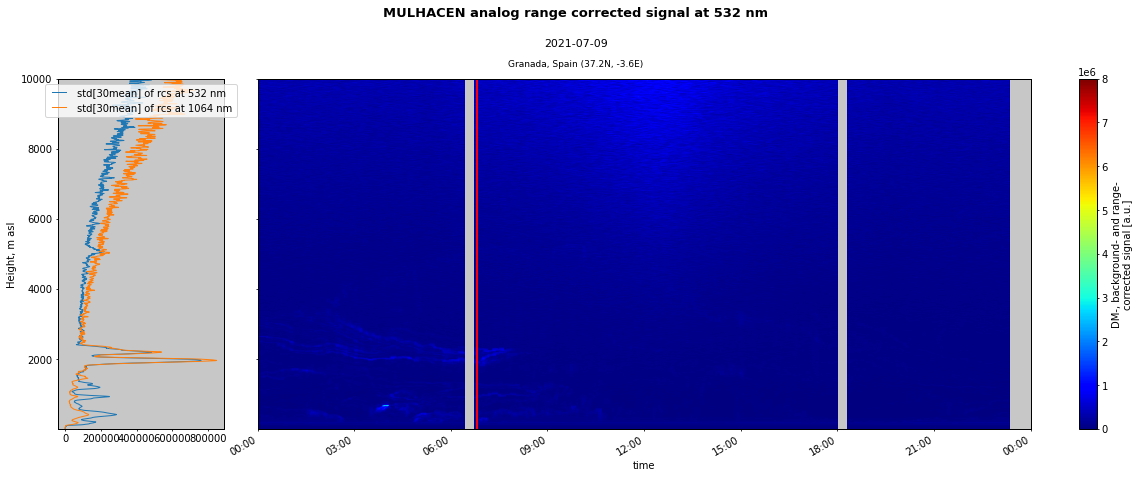

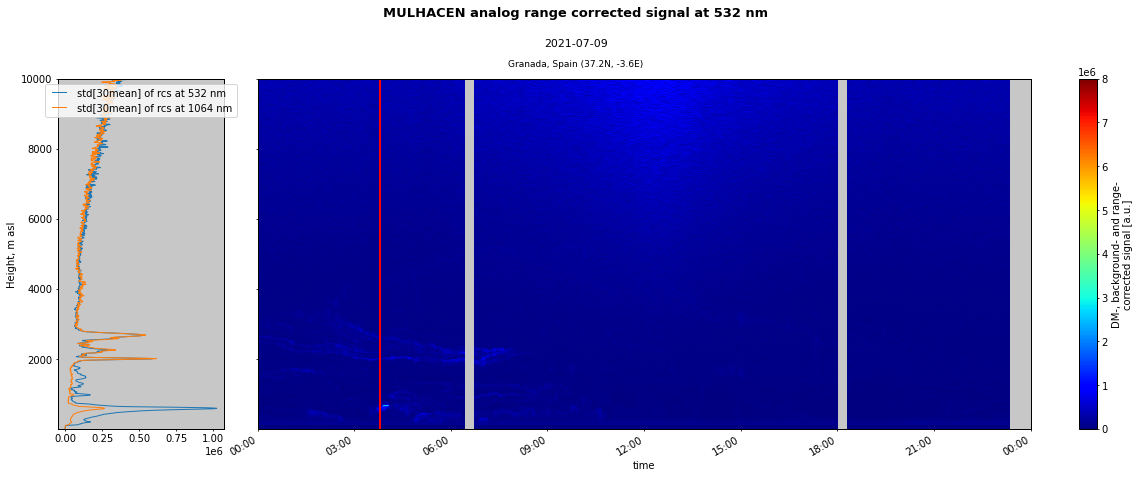

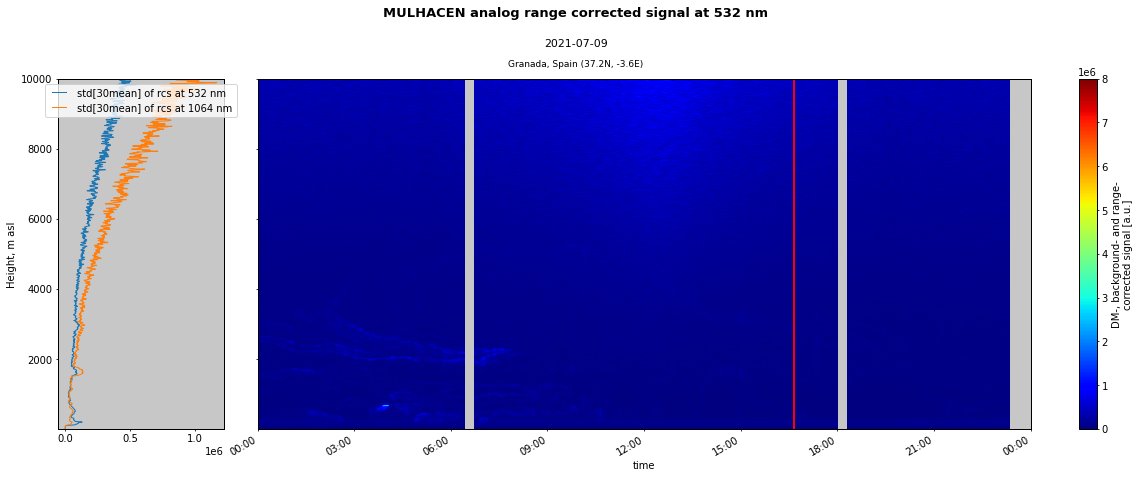

In [ ]:
qt = 'range corrected signal'
wl = '532'
signal_mode = 'analog'
channel = 'signal_532xpa'
time_win = [30]


for time in ['2021-07-09T06:48:16.000000000', '2021-07-09T03:47:14.000000000', '2021-07-09T16:38:16.000000000']:
  fig, ax = plt.subplots(figsize=[20,7])


  ax1 = plt.subplot(1,6,(1))

  for t_win in time_win:
  # ax1.plot(ds[rcs[0]].sel(time=time, method='nearest')[0].values, ds.range.values, lw=1, c='black', label='rcs at 532 nm')
    ax1.plot(ds[rcs[0]].rolling(dim={'range':3, 'time':t_win}, min_periods=3).std().sel(time=time, method='nearest')[0].values, 
            ds.range.values, lw=1, label='std[{t_win}mean] of rcs at 532 nm'.format(t_win=t_win))
    ax1.plot(ds[rcs[1]].rolling(dim={'range':3, 'time':t_win}, min_periods=3).std().sel(time=time, method='nearest')[0].values, 
            ds.range.values, lw=1, label='std[{t_win}mean] of rcs at 1064 nm'.format(t_win=t_win))
    ax1.legend(fontsize=10, loc='upper center')


  ax2 = plt.subplot(1,6,(2,6), sharey=ax1)
  plot_as_me(ds[rcs[0]].rolling(dim={'range':3, 'time':10}, min_periods=3).std(), 
          channel, 
          ax2, 
          qt, 
          wl, 
          signal_mode, 
          attrs=ds.attrs, 
          vmax=8e6)


  
  # Create rectangle x coordinates
  startTime = dt.datetime.strptime(time,'%Y-%m-%dT%H:%M:%S.000000000')
  endTime = dt.datetime.strptime(time,'%Y-%m-%dT%H:%M:%S.000000000') + dt.timedelta(minutes=1)
  start = mpl.dates.date2num(startTime)
  end = mpl.dates.date2num(endTime)
  width = end - start
  rect = mpl.patches.Rectangle((start, 0), width, 10000, linewidth=2,color='red',fill=False)
  ax2.add_patch(rect)
  ax2.set_ylabel('')
  ax1.set_ylabel('Height, m asl')
  ax1.ticklabel_format(axis='x', style='sci')
  # ax1.set_xlabel('STD', fontsize=14)
  # ax1.set_title('STD[{t_win}mean]'.format(t_win=t_win), fontsize=14)
  o_ = plt.setp(ax2.get_yticklabels(), visible=False)

  # year, month, day = str(ds.time[0].values.astype('datetime64[D]')).split('-')
  # hour = dt.datetime.strptime(time,'%Y-%m-%dT%H:%M:%S.000000000').hour
  # minute = dt.datetime.strptime(time,'%Y-%m-%dT%H:%M:%S.000000000').minute
  # out_dir =  '/content/drive/MyDrive/TRABAJO DE GRADO - SCE/Proyecto Avanzado II/Workbench/output_dir/images'
  # fl_name = '{instru}_{qt}_with_STD[{t_win}mean]_profile at_{hour}{minute}_{wl}_{mode}_mode_{y}{m}{d}.jpg'.format(instru=ds.attrs['system'], qt=qt, hour=hour, t_win=t_win, minute=minute, wl=wl, mode=signal_mode, y=year, m=month, d=day)
  # fl_name = os.path.join(out_dir, fl_name)
  # plt.savefig(fl_name, dpi=200)


## std de la señal.

In [ ]:

ds.time[200]


<xarray.DataArray 'time' ()>
array('2021-07-09T03:17:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2021-07-09T03:17:41

<class 'numpy.ndarray'>


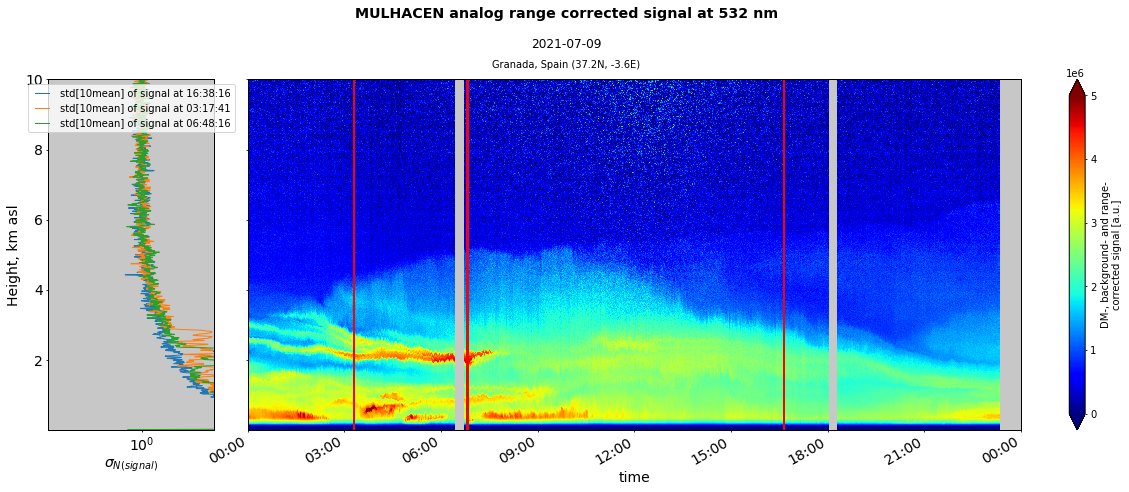

In [77]:
qt = 'range corrected signal'
wl = '532'
signal_mode = 'analog'
channel = 'signal_532xpa'
time_win = [10]


# for time in ['2021-07-09T06:48:16.000000000', '2021-07-09T03:47:14.000000000', '2021-07-09T16:38:16.000000000']:
# for time in ['2021-07-09T16:38:16.000000000', '2021-07-09T03:17:41.000000000', '2021-07-09T06:48:16.000000000']:
fig, ax = plt.subplots(figsize=[20,7])


ax1 = plt.subplot(1,6,(1))

ax2 = plt.subplot(1,6,(2,6), sharey=ax1)
plot_as_me(ds[rcs[0]], 
        channel, 
        ax2, 
        qt, 
        wl, 
        signal_mode, 
        attrs=ds.attrs, 
        vmax=5e6,
        vmin=0
        )

for time in ['2021-07-09T16:38:16.000000000', '2021-07-09T03:17:41.000000000', '2021-07-09T06:48:16.000000000']:
  for t_win in time_win:
    # ax1.plot(ds[rcs[0]].sel(time=time, method='nearest')[0].values, ds.range.values, lw=1, c='black', label='rcs at 532 nm')

    media_std= ds[signal[0]].rolling(dim={'range':3, 'time':t_win}, min_periods=3).std().sel(time=time, range=slice(6, 10))[0].mean()
    nstd = ds[signal[0]].rolling(dim={'range':3, 'time':t_win}, min_periods=3).std().sel(time=time, method='nearest')[0] / media_std 
    ax1.plot(nstd.values, ds.range.values, lw=1, label='std[{t_win}mean] of signal at {time}'.format(t_win=t_win, time=time[11:19]))
    
    # media_std= ds[signal[0]].rolling(dim={'range':3, 'time':t_win}, min_periods=3).std().sel(time=time, range=slice(6000, 10000))[0].mean()
    # nstd = ds[signal[0]].rolling(dim={'range':3, 'time':t_win}, min_periods=3).std().sel(time=time, method='nearest')[0] / media_std 
    # ax1.plot(nstd.values, ds.range.values, lw=1, label='std[{t_win}mean] of signal at 532 nm'.format(t_win=t_win))
    
    # media_std= ds[signal[0]].rolling(dim={'range':3, 'time':t_win}, min_periods=3).std().sel(time=time, range=slice(6000, 10000))[0].mean()
    # nstd = ds[signal[0]].rolling(dim={'range':3, 'time':t_win}, min_periods=3).std().sel(time=time, method='nearest')[0] / media_std 
    # ax1.plot(nstd.values, ds.range.values, lw=1, label='std[{t_win}mean] of signal at 532 nm'.format(t_win=t_win))

    startTime = dt.datetime.strptime(time,'%Y-%m-%dT%H:%M:%S.000000000')
    endTime = dt.datetime.strptime(time,'%Y-%m-%dT%H:%M:%S.000000000') + dt.timedelta(minutes=1)
    start = mpl.dates.date2num(startTime)
    end = mpl.dates.date2num(endTime)
    width = end - start
    rect = mpl.patches.Rectangle((start, 0), width, 10000, linewidth=2,color='red',fill=False)
    ax2.add_patch(rect)
      
  # ax1.plot(ds[signal[1]].rolling(dim={'range':3, 'time':t_win}, min_periods=3).std().sel(time=time, method='nearest')[0].values, 
  #         ds.range.values, lw=1, label='std[{t_win}mean] of signal at 1064 nm'.format(t_win=t_win))

  # ax1.plot(ds[signal[0]].rolling(dim={'range':3, 'time':t_win}, min_periods=3).std().sel(time='2021-07-09T06:48:16.000000000', method='nearest')[0].values, 
  #         ds.range.values, lw=1, label='std[{t_win}mean] of signal at 532 nm'.format(t_win=t_win))
  # ax1.plot(ds[signal[1]].rolling(dim={'range':3, 'time':t_win}, min_periods=3).std().sel(time='2021-07-09T06:48:16.000000000', method='nearest')[0].values, 
  #         ds.range.values, lw=1, label='std[{t_win}mean] of signal at 1064 nm'.format(t_win=t_win))
  
  # ax1.plot(ds[signal[0]].rolling(dim={'range':3, 'time':t_win}, min_periods=3).std().sel(time='2021-07-09T03:17:41.000000000', method='nearest')[0].values, 
  #         ds.range.values, lw=1, label='std[{t_win}mean] of signal at 532 nm'.format(t_win=t_win))
  # ax1.plot(ds[signal[1]].rolling(dim={'range':3, 'time':t_win}, min_periods=3).std().sel(time='2021-07-09T03:17:41.000000000', method='nearest')[0].values, 
  #         ds.range.values, lw=1, label='std[{t_win}mean] of signal at 1064 nm'.format(t_win=t_win))
  
  # ax1.plot(ds[signal[0]].rolling(dim={'range':3, 'time':t_win}, min_periods=3).std().sel(time='2021-07-09T03:17:41.000000000', method='nearest')[0].values, 
  #         ds.range.values, lw=1, label='std[{t_win}mean] of signal at 532 nm'.format(t_win=t_win))
  # ax1.plot(ds[signal[1]].rolling(dim={'range':3, 'time':t_win}, min_periods=3).std().sel(time='2021-07-09T03:17:41.000000000', method='nearest')[0].values, 
  #         ds.range.values, lw=1, label='std[{t_win}mean] of signal at 1064 nm'.format(t_win=t_win))



ax1.legend(fontsize=10, loc='upper center')
  
ax1.set_xscale('log')

# ax2 = plt.subplot(1,6,(2,6), sharey=ax1)
# plot_as_me(ds[rcs[0]], 
#         channel, 
#         ax2, 
#         qt, 
#         wl, 
#         signal_mode, 
#         attrs=ds.attrs, 
#         vmax=5e6
#         )



# Create rectangle x coordinates
# startTime = dt.datetime.strptime(time,'%Y-%m-%dT%H:%M:%S.000000000')
# endTime = dt.datetime.strptime(time,'%Y-%m-%dT%H:%M:%S.000000000') + dt.timedelta(minutes=1)
# start = mpl.dates.date2num(startTime)
# end = mpl.dates.date2num(endTime)
# width = end - start
# rect = mpl.patches.Rectangle((start, 0), width, 10000, linewidth=2,color='red',fill=False)
# ax2.add_patch(rect)
ax2.set_ylabel('')
ax2.set_xlabel('time', fontsize=14)
ax1.set_xlabel(r'$\sigma _{N(signal)}$', fontsize=14)
ax1.set_ylabel('Height, km asl', fontsize=14)
ax1.tick_params(axis='both', which='major', labelsize=14)
ax1.tick_params(axis='both', which='minor', labelsize=14)
ax2.tick_params(axis='both', which='major', labelsize=14)
ax2.tick_params(axis='both', which='minor', labelsize=14)
ax1.set_xlim(5e-2, 1e1)
# ax1.ticklabel_format(axis='x', style='sci')
# ax1.set_xlabel('STD', fontsize=14)
# ax1.set_title('STD[{t_win}mean]'.format(t_win=t_win), fontsize=14)
o_ = plt.setp(ax2.get_yticklabels(), visible=False)

# year, month, day = str(ds.time[0].values.astype('datetime64[D]')).split('-')
# hour = dt.datetime.strptime(time,'%Y-%m-%dT%H:%M:%S.000000000').hour
# minute = dt.datetime.strptime(time,'%Y-%m-%dT%H:%M:%S.000000000').minute
# out_dir =  '/content/drive/MyDrive/TRABAJO DE GRADO - SCE/Proyecto Avanzado II/Workbench/output_dir/images'
# fl_name = '{instru}_{qt}_with_STD[{t_win}mean]_profile at_{hour}{minute}_{wl}_{mode}_mode_{y}{m}{d}.jpg'.format(instru=ds.attrs['system'], qt=qt, hour=hour, t_win=t_win, minute=minute, wl=wl, mode=signal_mode, y=year, m=month, d=day)
# fl_name = os.path.join(out_dir, fl_name)
# plt.savefig(fl_name, dpi=200)


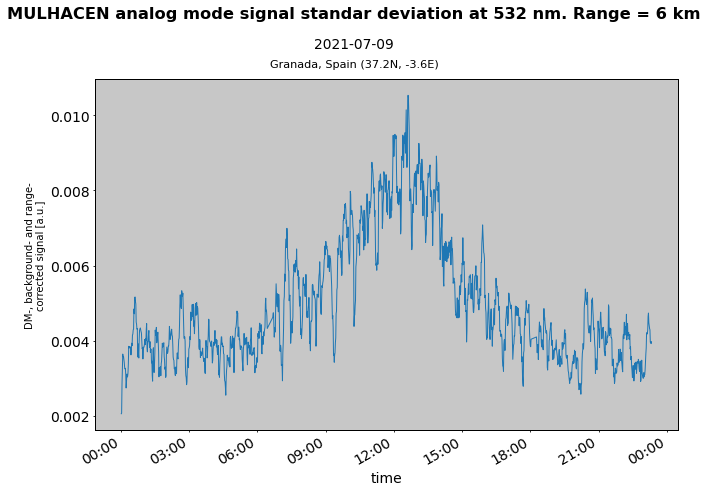

In [50]:
# t_win = 10
fig, ax = plt.subplots(figsize=[10,7])


plot.title1('MULHACEN analog mode signal standar deviation at 532 nm. Range = 6 km', 2.5)
plot.title2(str(ds.time.values[0].astype('datetime64[D]')), coef=2.5)
plot.title3('{} ({:.1f}N, {:.1f}E)'.format(ds.attrs['site_location'], 
                                           float(ds.attrs['geospatial_lat_min']), 
                                           float(ds.attrs['geospatial_lon_min'])), coef=2.5)

ds[signal[0]].rolling(dim={'range':3, 'time':t_win}, min_periods=3).std().sel(range=6, method='nearest').plot(x='time')

ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=14)
plt.xlabel('time', fontsize=14)
plt.title('')
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)

Hay que normalizar los perfiles en altura para que todos tengan el mismo valor de umbral.

# Busqueda de un día limpio para la determinación de un umbral en la STD.

In [ ]:
dirs = glob.glob('/content/drive/MyDrive/TRABAJO DE GRADO - SCE/Datos/Estancia/PREPROCESSED/*', recursive=True)
# dirs = glob.glob('/Mi unidad/TRABAJO DE GRADO - SCE/Datos/Estancia/PREPROCESSED/*', recursive=True)

channel = 'corrected_signal_00'
t_win = 10
# ds
dirs

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


ValueError: ignored

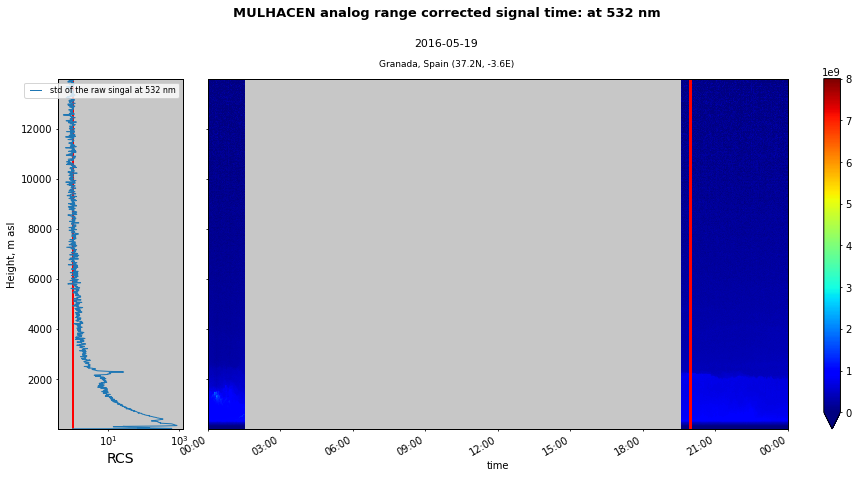

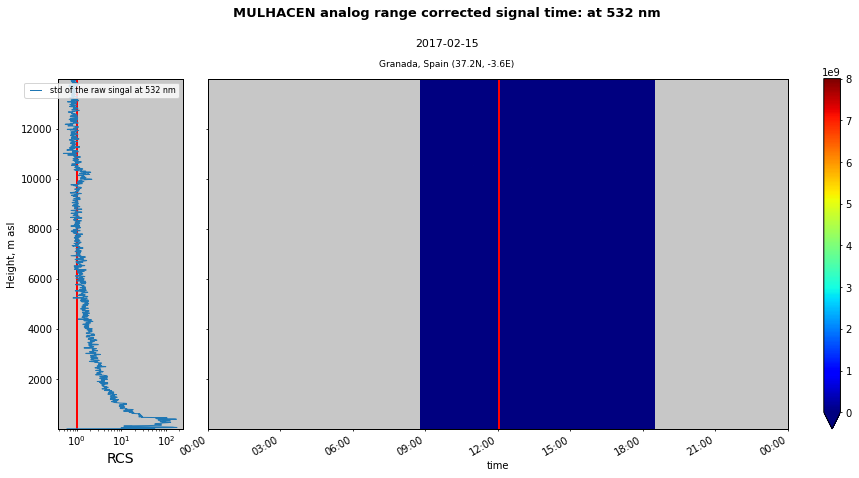

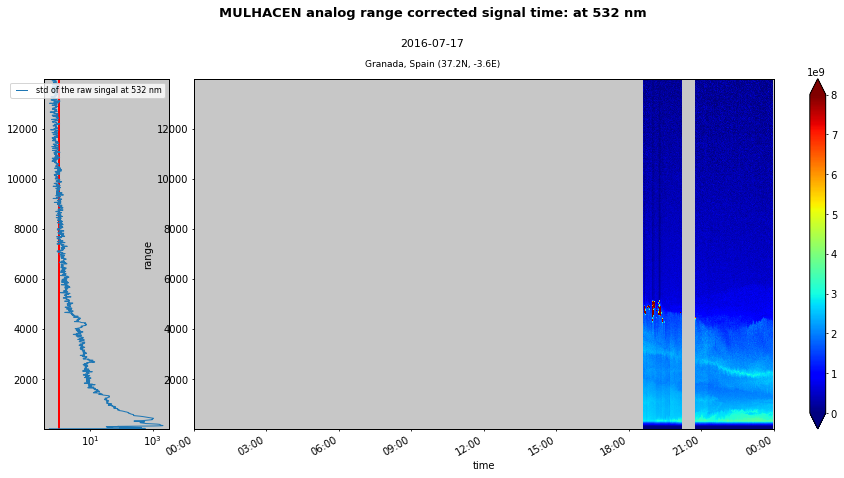

In [ ]:


for dir in dirs[5:8]:
  # try:
    ds = xr.open_dataset(dir)

    
    
    qt = 'range corrected signal'
    wl = '532'
    signal_mode = 'analog'
    fig, ax = plt.subplots(figsize=[15,7])


    ax1 = plt.subplot(1,6,(1))
    time = ds.time[int(len(ds.time)/3)].values

    qt = 'range corrected signal time:{time}'.format(time='')
    
    media_std= ds[channel].rolling(dim={'range':3, 'time':t_win}, min_periods=3).std().sel(time=time, range=slice(6000, 14000)).mean()
    nstd = ds[channel].rolling(dim={'range':3, 'time':t_win}, min_periods=3).std().sel(time=time, method='nearest') / media_std 
    ax1.plot(nstd, ds.range.values, lw=1, label='std of the raw singal at 532 nm')
    # ax1.plot(ds[rcs[1]].sel(time=time, method='nearest')[0].values, ds.range.values, lw=2, c='r', label='rcs profile at 1064 nm')
    ax1.legend(fontsize=8)
    ax1.set_xscale('log')
    # ax1.set_xlim(0.05, 2000)

    rect2 = mpl.patches.Rectangle((1, 0), 0.001, 14000, linewidth=2,color='red',fill=False)
    ax1.add_patch(rect2)
    # rect3 = mpl.patches.Rectangle((1.46153563, 0), 0.001, 14000, linewidth=2,color='red',fill=False)
    # ax1.add_patch(rect3)


    ax2 = plt.subplot(1,6,(2,6), sharey=ax1)

    plot_as_me(ds[channel]*ds.range**2, channel, ax2, qt, wl, signal_mode, attrs=ds.attrs, vmin=0, vmax=8e9)

    startTime = dt.datetime.strptime(str(time),'%Y-%m-%dT%H:%M:%S.000000000')
    endTime = dt.datetime.strptime(str(time),'%Y-%m-%dT%H:%M:%S.000000000') + dt.timedelta(minutes=1)
    start = mpl.dates.date2num(startTime)
    end = mpl.dates.date2num(endTime)
    width = end - start
    
    rect = mpl.patches.Rectangle((start, 0), width, 14000, linewidth=2,color='red',fill=False)
    ax2.add_patch(rect)
    ax2.set_ylabel('')
    ax1.set_ylabel('Height, m asl')
    ax1.set_xlabel('RCS', fontsize=14)
    o_ = plt.setp(ax2.get_yticklabels(), visible=False)
  # except:
  #   print('Can not plot dataset {}'.format(dir))
  #   continue


    


  # year, month, day = str(ds.time[0].values.astype('datetime64[D]')).split('-') 
  # out_dir =  '/content/drive/MyDrive/TRABAJO DE GRADO - SCE/Proyecto Avanzado II/Workbench/output_dir/images'
  # fl_name = '{instru}_{qt}_{wl}_{mode}_mode_{y}{m}{d}.jpg'.format(instru=ds.attrs['system'], qt=qt, wl=wl, mode=signal_mode, y=year, m=month, d=day)
  # fl_name = os.path.join(out_dir, fl_name)
  # plt.savefig(fl_name, dpi=200)

Para fotomultiplicadores, las STD es la raíz cuadrada de la medida, por la distribución de Posion.

In [ ]:
dirs_selected = ['/content/drive/MyDrive/TRABAJO DE GRADO - SCE/Datos/Estancia/PREPROCESSED/mhc_20160630.nc',
                 '/content/drive/MyDrive/TRABAJO DE GRADO - SCE/Datos/Estancia/PREPROCESSED/mhc_20161031.nc',
                 '/content/drive/MyDrive/TRABAJO DE GRADO - SCE/Datos/Estancia/PREPROCESSED/mhc_20160711.nc',        
]


# RCS estandarizada

In [ ]:
dirs = glob.glob('/content/drive/MyDrive/TRABAJO DE GRADO - SCE/Datos/Estancia/PREPROCESSED/*', recursive=True)
# dirs = glob.glob('/Mi unidad/TRABAJO DE GRADO - SCE/Datos/Estancia/PREPROCESSED/*', recursive=True)
channel = 'corrected_signal_00'
t_win = 10

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Can not plot dataset /content/drive/MyDrive/TRABAJO DE GRADO - SCE/Datos/Estancia/PREPROCESSED/mhc_20160629.nc
<class 'numpy.ndarray'>
Can not plot dataset /content/drive/MyDrive/TRABAJO DE GRADO - SCE/Datos/Estancia/PREPROCESSED/mhc_20170215.nc
<class 'numpy.ndarray'>
Can not plot dataset /content/drive/MyDrive/TRABAJO DE GRADO - SCE/Datos/Estancia/PREPROCESSED/mhc_20160717.nc
<class 'numpy.ndarray'>


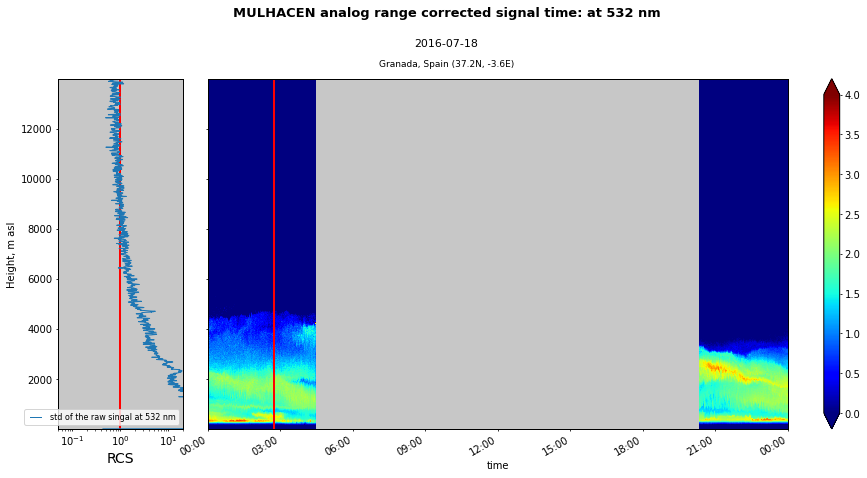

Error in callback <function flush_figures at 0x7f3a7d6a3e60> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
for dir in dirs[0:9]:
  try:
    ds = xr.open_dataset(dir)

    qt = 'range corrected signal'
    wl = '532'
    signal_mode = 'analog'
    fig, ax = plt.subplots(figsize=[15,7])


    ax1 = plt.subplot(1,6,(1))
    time = ds.time[int(len(ds.time)/3)].values

    qt = 'range corrected signal time:{time}'.format(time='')
    
    media_std= ds[channel].rolling(dim={'range':3, 'time':t_win}, min_periods=3).std().sel(time=time, range=slice(6000, 14000)).mean()
    nstd = ds[channel].rolling(dim={'range':3, 'time':t_win}, min_periods=3).std().sel(time=time, method='nearest') / media_std 
    ax1.plot(nstd, ds.range.values, lw=1, label='std of the raw singal at 532 nm')
    # ax1.plot(ds[rcs[1]].sel(time=time, method='nearest')[0].values, ds.range.values, lw=2, c='r', label='rcs profile at 1064 nm')
    ax1.legend(fontsize=8)
    ax1.set_xscale('log')
    ax1.set_xlim(0.05, 20)

    rect2 = mpl.patches.Rectangle((1, 0), 0.001, 14000, linewidth=2,color='red',fill=False)
    ax1.add_patch(rect2)
    # rect3 = mpl.patches.Rectangle((1.46153563, 0), 0.001, 14000, linewidth=2,color='red',fill=False)
    # ax1.add_patch(rect3)


    ax2 = plt.subplot(1,6,(2,6), sharey=ax1)

    plot_as_me(normalize_ds(ds[channel]*ds.range**2), channel, ax2, qt, wl, signal_mode, attrs=ds.attrs, vmin=0, vmax=4)

    startTime = dt.datetime.strptime(str(time),'%Y-%m-%dT%H:%M:%S.000000000')
    endTime = dt.datetime.strptime(str(time),'%Y-%m-%dT%H:%M:%S.000000000') + dt.timedelta(minutes=1)
    start = mpl.dates.date2num(startTime)
    end = mpl.dates.date2num(endTime)
    width = end - start
    
    rect = mpl.patches.Rectangle((start, 0), width, 14000, linewidth=2,color='red',fill=False)
    ax2.add_patch(rect)
    ax2.set_ylabel('')
    ax1.set_ylabel('Height, m asl')
    # ax1.set_xlabel('RCS', fontsize=14)
    o_ = plt.setp(ax2.get_yticklabels(), visible=False)
  except:
    print('Can not plot dataset {}'.format(dir))
    continue


    


  # year, month, day = str(ds.time[0].values.astype('datetime64[D]')).split('-') 
  # out_dir =  '/content/drive/MyDrive/TRABAJO DE GRADO - SCE/Proyecto Avanzado II/Workbench/output_dir/images'
  # fl_name = '{instru}_{qt}_{wl}_{mode}_mode_{y}{m}{d}.jpg'.format(instru=ds.attrs['system'], qt=qt, wl=wl, mode=signal_mode, y=year, m=month, d=day)
  # fl_name = os.path.join(out_dir, fl_name)
  # plt.savefig(fl_name, dpi=200)

# 


In [ ]:
ds = xr.open_dataset('/content/drive/MyDrive/TRABAJO DE GRADO - SCE/Proyecto Avanzado II/Workbench/1a/20210709/mhc_rcs_20210709.nc')
rcs = ['corrected_rcs_00', 'corrected_rcs_02']
signal = ['corrected_signal_00', 'corrected_signal_02']
ds

<xarray.Dataset>
Dimensions:                (n_chan: 2, nv: 2, range: 1333, time: 1395)
Coordinates:
  * range                  (range) float32 7.5 15.0 22.5 ... 9.99e+03 9.998e+03
  * time                   (time) datetime64[ns] 2021-07-09T00:00:42 ... 2021...
  * n_chan                 (n_chan) int32 0 2
Dimensions without coordinates: nv
Data variables: (12/48)
    time_bnds              (time, nv) datetime64[ns] ...
    lat                    float32 ...
    lon                    float32 ...
    altitude               float32 ...
    wavelength             (n_chan) float32 ...
    telescope              (n_chan) int32 ...
    ...                     ...
    corrected_rcs_02       (time, range) float64 ...
    dc_smoothed_02         (time, range) float64 ...
    bin_zero               (n_chan) float64 ...
    dead_time              (n_chan) float64 ...
    total_rcs532_an        (time, range) float64 ...
    LVDR532_an             (time, range) float64 ...
Attributes: (12/74)
    system:                          MULHACEN
    manufacturers:                   Raymetrics
    overlap_is_corrected:            false
    overlap_function:                false
    site_location:                   Granada, Spain
    instrument_id:                   MULHACEN
    ...                              ...
    telescope0_manufacturer:         Raymetrics
    telescope0_model:                special
    BCK_MIN_ALT:                     75000
    BCK_MAX_ALT:                     105000
    lidarNick:                       mhc
    dataversion:                     1a

<class 'numpy.ndarray'>


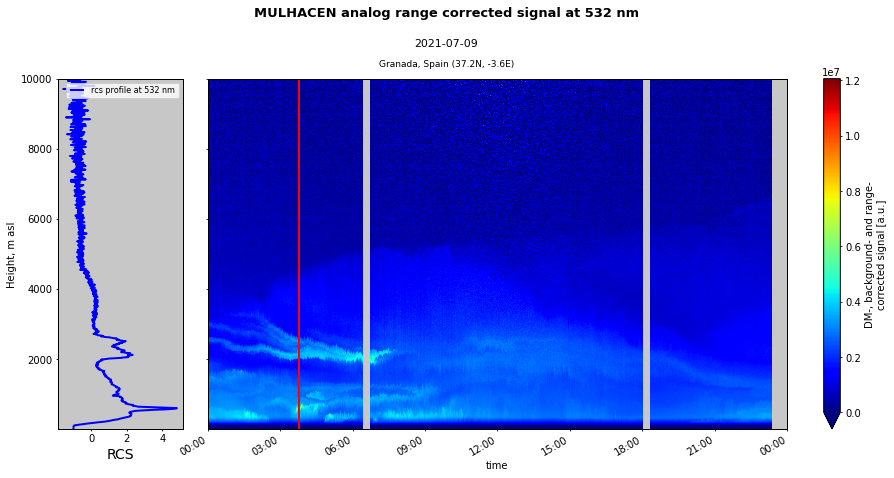

In [ ]:
qt = 'range corrected signal'
wl = '532'
signal_mode = 'analog'
channel = 'signal_532xpa'

# for time in ['2021-07-09T06:48:16.000000000', '2021-07-09T03:47:14.000000000', '2021-07-09T16:38:16.000000000']:
for time in ['2021-07-09T03:47:14.000000000']:
  fig, ax = plt.subplots(figsize=[15,7])


  # plot.title1('{instr} range corrected at {wl}? {wlu}'.format(instr=ds.attrs['system'],
  #                                                             wl=532,
  #                                                             wlu='nm'), coef=2)
  # plot.title2(str(ds.time.values[0].astype('datetime64[D]')), coef=2)

  # plot.title3('{} ({:.1f}N, {:.1f}E)'.format(ds.attrs['site_location'], 
  #                                           float(ds.attrs['geospatial_lat_min']), 
  #                                           float(ds.attrs['geospatial_lon_min'])), coef=2)

  

  ax1 = plt.subplot(1,6,(1))

  ax1.plot(normalize_ds(ds[rcs[0]].sel(time=time, method='nearest')).values[0], ds.range.values, lw=2, c='b', label='rcs profile at 532 nm')
  # ax1.plot(ds[rcs[1]].sel(time=time, method='nearest')[0].values, ds.range.values, lw=2, c='r', label='rcs profile at 1064 nm')
  ax1.legend(fontsize=8)

  ax2 = plt.subplot(1,6,(2,6), sharey=ax1)
  # q = ds[rcs[0]][:, ds[rcs[0]].range<10000].plot.pcolormesh(x='time', 
  #                 y='range', 
  #                 cmap='jet', 
  #                 vmin=0, 
  #                 vmax=8e6,
  #                 # norm=norm
  #                 )
  
  plot_as_me(ds[rcs[0]], 
           channel, 
           ax2, 
           qt, 
           wl, 
           signal_mode, 
           attrs=ds.attrs, 
           vmin=0,
           vmax=None)


  
  # Create rectangle x coordinates
  startTime = dt.datetime.strptime(time,'%Y-%m-%dT%H:%M:%S.000000000')
  endTime = dt.datetime.strptime(time,'%Y-%m-%dT%H:%M:%S.000000000') + dt.timedelta(minutes=1)
  start = mpl.dates.date2num(startTime)
  end = mpl.dates.date2num(endTime)
  width = end - start
  rect = mpl.patches.Rectangle((start, 0), width, 10000, linewidth=2,color='red',fill=False)
  ax2.add_patch(rect)
  ax2.set_ylabel('')
  ax1.set_ylabel('Height, m asl')
  ax1.set_xlabel('RCS', fontsize=14)
  o_ = plt.setp(ax2.get_yticklabels(), visible=False)

  year, month, day = str(ds.time[0].values.astype('datetime64[D]')).split('-')
  hour = dt.datetime.strptime(time,'%Y-%m-%dT%H:%M:%S.000000000').hour
  minute = dt.datetime.strptime(time,'%Y-%m-%dT%H:%M:%S.000000000').minute
  out_dir =  '/content/drive/MyDrive/TRABAJO DE GRADO - SCE/Proyecto Avanzado II/Workbench/output_dir/images'
  fl_name = '{instru}_{qt}_with_profile at_{hour}{minute}_{wl}_{mode}_mode_{y}{m}{d}.jpg'.format(instru=ds.attrs['system'], qt=qt, hour=hour, minute=minute, wl=wl, mode=signal_mode, y=year, m=month, d=day)
  fl_name = os.path.join(out_dir, fl_name)
  plt.savefig(fl_name, dpi=200)